# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) DSI-5 Capstone Project: EDA of dataset

This Jupyter notebook deals with the EDA of the Global video game weekly sales dataset only. Additional regional weekly sales data was also scraped but not used in the final presentation of this project.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%matplotlib inline

In [69]:
glb = pd.read_csv('./data/GlobalWeeklySales.csv', index_col=False).drop('Unnamed: 0', axis=1)
glb.shape

(52939, 8)

In [70]:
def cleanit(df):
    #Drop all the locked sales data with 'Pro' value
    df.drop(df.index[df['Weekly_Sales']=='Pro'],inplace=True)
    
    #Drop all NaN values for game names
    df.drop(df.index[df['Name'].isnull()],inplace=True)
    
    #Change 'Week_Ending' to datetime format
    df['Week_Ending'] = pd.to_datetime(df['Week_Ending'])
    #Getting Year, Month and Day info from datetime
    df['Year'] = df['Week_Ending'].apply(lambda x : x.year)
    df['Month'] = df['Week_Ending'].apply(lambda x : x.month)
    df['Date'] = df['Week_Ending'].apply(lambda x : x.day)
    
    #Changing Sales numbers and Week No. to integers
    df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x: int(x.replace(',','')))
    df['Total_Sales'] = df['Total_Sales'].fillna(str(0))
    df['Total_Sales'] = df['Total_Sales'].apply(lambda x: int(x.replace(',','')))
    df['Week_No.'] = df['Week_No.'].apply(lambda x: int(x))
    
    return df

In [71]:
glb = cleanit(glb)
glb

,Name,Platform,Publisher,Genre,Weekly_Sales,Total_Sales,Week_No.,Week_Ending,Year,Month,Date
0,Super Mario 64 DS,DS,Nintendo,Platform,261853,261853,1,2004-11-27,2004,11,27
1,Spider-Man 2,DS,Activision,Action,47719,47719,1,2004-11-27,2004,11,27
2,Madden NFL 2005,DS,Electronic Arts,Sports,41021,41021,1,2004-11-27,2004,11,27
3,The Urbz: Sims In the City (US weekly sales),DS,Electronic Arts,Simulation,32889,32889,1,2004-11-27,2004,11,27
4,Asphalt: Urban GT,DS,Ubisoft,Racing,30525,30525,1,2004-11-27,2004,11,27
5,Feel the Magic XY/XX,DS,Sega,Puzzle,14727,14727,1,2004-11-27,2004,11,27
6,Super Mario 64 DS,DS,Nintendo,Platform,244885,506738,2,2004-12-04,2004,12,4
7,WarioWare Touched!,DS,Nintendo,Puzzle,137254,137254,1,2004-12-04,2004,12,4
9,Spider-Man 2,DS,Activision,Action,41732,89451,2,2004-12-04,2004,12,4
10,Feel the Magic XY/XX,DS,Sega,Puzzle,35547,50274,2,2004-12-04,2004,12,4


In [72]:
glb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21181 entries, 0 to 52893
Data columns (total 11 columns):
Name            21181 non-null object
Platform        21181 non-null object
Publisher       21181 non-null object
Genre           21181 non-null object
Weekly_Sales    21181 non-null int64
Total_Sales     21181 non-null int64
Week_No.        21181 non-null int64
Week_Ending     21181 non-null datetime64[ns]
Year            21181 non-null int64
Month           21181 non-null int64
Date            21181 non-null int64
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 1.9+ MB


### _Note: Sales numbers are units sold_

### Checking games sold by year

In [73]:
glb.groupby(['Year'])[['Weekly_Sales']].sum()

,Weekly_Sales
Year,
2004,3096957
2005,38943615
2006,81501589
2007,145987365
2008,210599509
2009,206466030
2010,235886392
2011,225398913
2012,179194088


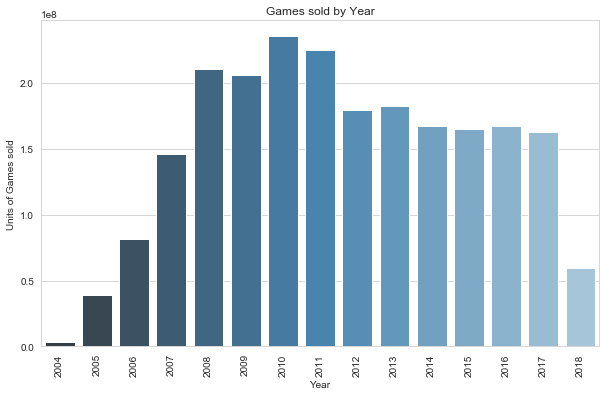

In [74]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x = 'Year', y = 'Weekly_Sales', data = glb.groupby(['Year'])[['Weekly_Sales']].sum().reset_index(), palette='Blues_d')
ax.set_ylabel('Units of Games sold')
ax.set_title('Games sold by Year')
plt.xticks(rotation=90)
plt.show()

### Checking games sold by Month

In [222]:
glb.groupby(['Month'])[['Weekly_Sales']].sum()

,Weekly_Sales
Month,
1,144549078
2,115990410
3,161797622
4,110562742
5,121628587
6,106508698
7,102234003
8,106310577
9,175567851


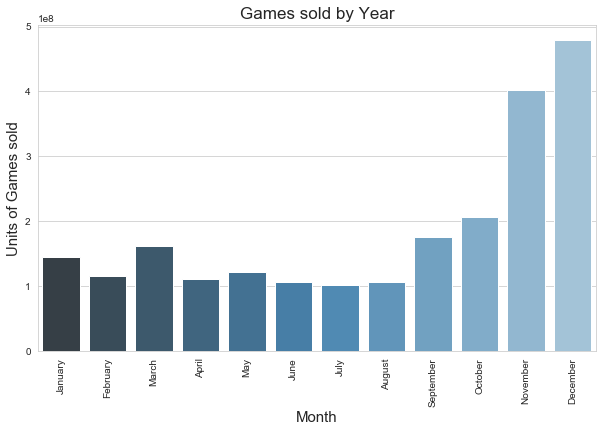

In [229]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x = 'Month', y = 'Weekly_Sales', data = glb.groupby(['Month'])[['Weekly_Sales']].sum().reset_index(), palette='Blues_d')
ax.set_ylabel('Units of Games sold', fontsize=15)
ax.set_xlabel('Month', fontsize=15)
ax.set_title('Games sold by Year',fontsize = 17)
plt.xticks(np.arange(12),('January','February','March','April','May','June','July','August','September','October','November','December'), rotation=90)
plt.show()

### Checking Most Popular Genre

In [75]:
glb.groupby(['Genre'])['Weekly_Sales'].sum().sort_values(ascending=False)

Genre
Shooter             458966683
Action              408328443
Sports              394659668
Role-Playing        251341827
Misc                192521728
Racing              143970989
Platform            143482816
Adventure            77412863
Fighting             60798726
Simulation           58416945
Strategy             15611477
Action-Adventure     12532932
Puzzle               10832489
Party                 1767474
Music                  795426
MMO                    189183
Name: Weekly_Sales, dtype: int64

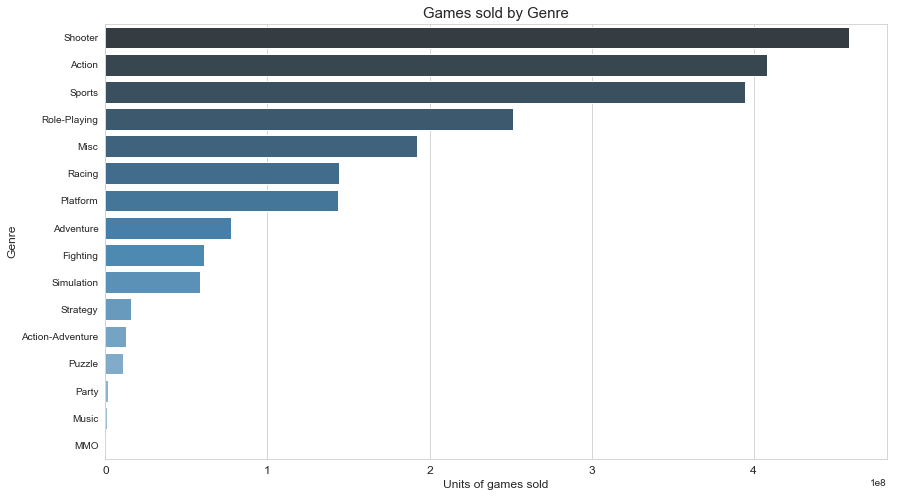

In [234]:
#Top values in dataset
f, ax = plt.subplots(figsize=(14, 8))
ax = sns.barplot(x='Weekly_Sales',y='Genre', data = glb.groupby(['Genre'])['Weekly_Sales'].sum().sort_values(ascending=False).reset_index(), palette='Blues_d')
ax.set_xlabel('Units of games sold',fontsize=12)
ax.set_ylabel('Genre',fontsize=12)
ax.set_title('Games sold by Genre', fontsize = 15)
plt.xticks(fontsize = 12)
plt.show()

### Checking Most Popular Publisher

In [77]:
glb['Publisher'].nunique()

133

In [78]:
glb.groupby(['Publisher'])['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

Publisher
Nintendo                       674049445
Electronic Arts                293381442
Activision                     288700033
Ubisoft                        156303971
Take-Two Interactive           128464793
Microsoft Game Studios         119504989
Sony Computer Entertainment     88605532
Capcom                          70913289
Square Enix                     65063089
Bethesda Softworks              44656062
Name: Weekly_Sales, dtype: int64

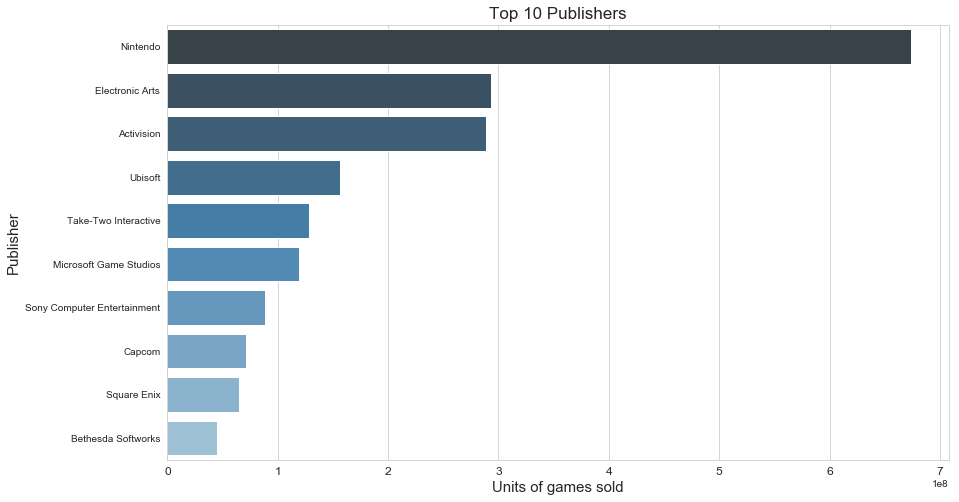

In [238]:
#Top values in dataset
f, ax = plt.subplots(figsize=(14, 8))
ax = sns.barplot(x='Weekly_Sales',y='Publisher', data = glb.groupby(['Publisher'])['Weekly_Sales'].sum().sort_values(ascending=False).head(10).reset_index(), palette='Blues_d')
ax.set_xlabel('Units of games sold', fontsize = 15)
ax.set_ylabel('Publisher', fontsize = 15)
ax.set_title('Top 10 Publishers',fontsize=17)
plt.xticks(fontsize = 12)
plt.show()

### Checking most games sold on which platform

In [80]:
glb.groupby(['Platform'])['Weekly_Sales'].sum().sort_values(ascending=False)

Platform
X360    426573229
Wii     379981435
PS3     362441329
PS4     351607015
DS      228303091
3DS     156009785
XOne    133272532
PSP      61399510
NS       48840406
PC       39314482
WiiU     34034041
PSV       9852814
Name: Weekly_Sales, dtype: int64

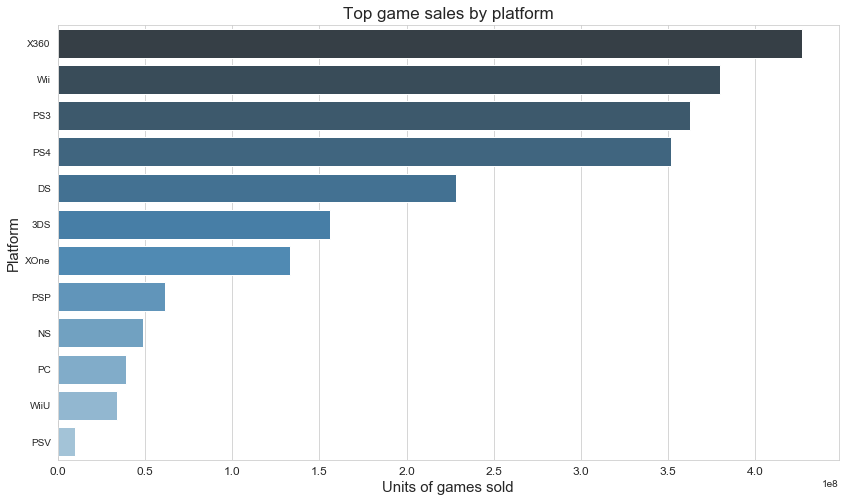

In [240]:
#Top values in dataset
f, ax = plt.subplots(figsize=(14, 8))
ax = sns.barplot(x='Weekly_Sales',y='Platform', data = glb.groupby(['Platform'])['Weekly_Sales'].sum().sort_values(ascending=False).reset_index(), palette='Blues_d')
ax.set_xlabel('Units of games sold',fontsize = 15)
ax.set_ylabel('Platform',fontsize = 15)
ax.set_title('Top game sales by platform',fontsize=17)
plt.xticks(fontsize = 12)
plt.show()

### Analyzing trends over time for Global Sales

In [82]:
glb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21181 entries, 0 to 52893
Data columns (total 11 columns):
Name            21181 non-null object
Platform        21181 non-null object
Publisher       21181 non-null object
Genre           21181 non-null object
Weekly_Sales    21181 non-null int64
Total_Sales     21181 non-null int64
Week_No.        21181 non-null int64
Week_Ending     21181 non-null datetime64[ns]
Year            21181 non-null int64
Month           21181 non-null int64
Date            21181 non-null int64
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 1.9+ MB


In [83]:
#it's worth remembering that null values for 'Total_Sales' is filled in with '0' at the moment
glb.groupby(['Week_No.'])[['Weekly_Sales']].sum()

,Weekly_Sales
Week_No.,
-79,16853
-46,63551
-45,38539
-44,32357
-43,28731
-42,33020
-41,29932
-40,32875
-39,52655


In [84]:
#Ignoring week no. less than 0 and more than 20 for now
data = glb.groupby(['Week_No.'])[['Weekly_Sales']].sum().reset_index()
data = data.drop(data.index[data['Week_No.']<0])
data = data.drop(data.index[data['Week_No.']>20])
data

,Week_No.,Weekly_Sales
17,0,1627735
18,1,654493201
19,2,219589745
20,3,123856864
21,4,99016574
22,5,88307330
23,6,80784984
24,7,67506404
25,8,57819968
26,9,46728366


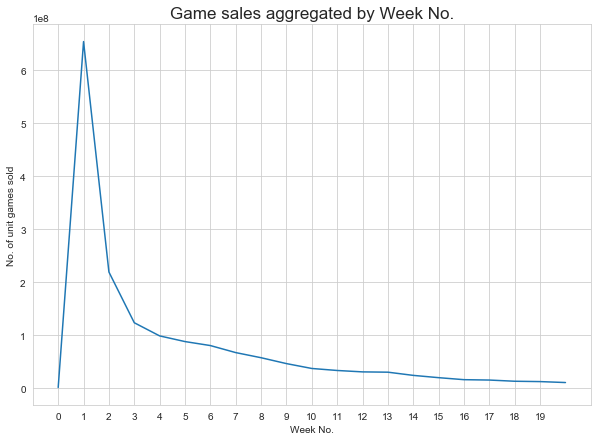

In [93]:
fig = plt.subplots(figsize=(10,7))
ax = sns.lineplot(x='Week_No.', y='Weekly_Sales', data = data)
plt.xticks(np.arange(0, 20, step=1))
ax.set_title('Game sales aggregated by Week No.', fontsize = 17)
ax.set_ylabel('No. of unit games sold')
ax.set_xlabel('Week No.')
plt.show()

Plotting a random sample of 10 games

In [116]:
#Checking which games have 0 Total Sales info
drop_sample = glb.loc[glb['Total_Sales']==0]['Name'].unique()
drop_sample

array(['The Urbz: Sims in the City (all regions sales)',
       'Egg Monster Hero', 'Madden NFL 06', 'Gun', 'Worms: Open Warfare',
       'Madden NFL 07', 'Ridge Racer 2', 'Tiger Woods PGA Tour 07',
       'Chibi-Robo! Park Patrol', 'Rock Band',
       'Advance Wars: Days of Ruin',
       'LEGO Indiana Jones: The Original Adventures',
       'LEGO Batman: The Videogame', 'Silent Hill: Homecoming',
       'PES 2009: Pro Evolution Soccer', 'Wet', 'God Eater', 'BioShock 2',
       'Yakuza 4', 'TERA', 'Tomb Raider (2011)'], dtype=object)

In [118]:
#dropping these games for analysis
glb2 = glb.drop(glb.index[glb['Name'].isin(drop_sample)])

In [218]:
#choosing random 10 games:
sample = ['Call of Duty: Modern Warfare 2','Final Fantasy XIV: Heavensward','Grand Theft Auto V','Mario Kart 7','Minecraft','New Super Mario Bros.','Robots','Thief']
sampledf = glb2[glb2['Name'].isin(sample)]
sampledf

,Name,Platform,Publisher,Genre,Weekly_Sales,Total_Sales,Week_No.,Week_Ending,Year,Month,Date
467,Robots,DS,Vivendi Games,Action,39755,39755,5,2005-03-26,2005,3,26
527,Robots,DS,Vivendi Games,Action,11393,51148,6,2005-04-02,2005,4,2
587,Robots,DS,Vivendi Games,Action,4652,55800,7,2005-04-09,2005,4,9
4789,New Super Mario Bros.,DS,Nintendo,Platform,176111,176111,1,2006-05-20,2006,5,20
4864,New Super Mario Bros.,DS,Nintendo,Platform,1065992,1242103,2,2006-05-27,2006,5,27
4939,New Super Mario Bros.,DS,Nintendo,Platform,433020,1675124,3,2006-06-03,2006,6,3
5014,New Super Mario Bros.,DS,Nintendo,Platform,385269,2060392,4,2006-06-10,2006,6,10
5089,New Super Mario Bros.,DS,Nintendo,Platform,327750,2388142,5,2006-06-17,2006,6,17
5164,New Super Mario Bros.,DS,Nintendo,Platform,290179,2678321,6,2006-06-24,2006,6,24
5239,New Super Mario Bros.,DS,Nintendo,Platform,399001,3077322,7,2006-07-01,2006,7,1


In [219]:
sampledata = sampledf.drop(sampledf.index[sampledf['Week_No.']<0])
sampledata = sampledata.drop(sampledata.index[sampledata['Week_No.']>20])
sampledata

,Name,Platform,Publisher,Genre,Weekly_Sales,Total_Sales,Week_No.,Week_Ending,Year,Month,Date
467,Robots,DS,Vivendi Games,Action,39755,39755,5,2005-03-26,2005,3,26
527,Robots,DS,Vivendi Games,Action,11393,51148,6,2005-04-02,2005,4,2
587,Robots,DS,Vivendi Games,Action,4652,55800,7,2005-04-09,2005,4,9
4789,New Super Mario Bros.,DS,Nintendo,Platform,176111,176111,1,2006-05-20,2006,5,20
4864,New Super Mario Bros.,DS,Nintendo,Platform,1065992,1242103,2,2006-05-27,2006,5,27
4939,New Super Mario Bros.,DS,Nintendo,Platform,433020,1675124,3,2006-06-03,2006,6,3
5014,New Super Mario Bros.,DS,Nintendo,Platform,385269,2060392,4,2006-06-10,2006,6,10
5089,New Super Mario Bros.,DS,Nintendo,Platform,327750,2388142,5,2006-06-17,2006,6,17
5164,New Super Mario Bros.,DS,Nintendo,Platform,290179,2678321,6,2006-06-24,2006,6,24
5239,New Super Mario Bros.,DS,Nintendo,Platform,399001,3077322,7,2006-07-01,2006,7,1


Text(0.5,1,'Global Sales - Random sample of 10 games life cycle')

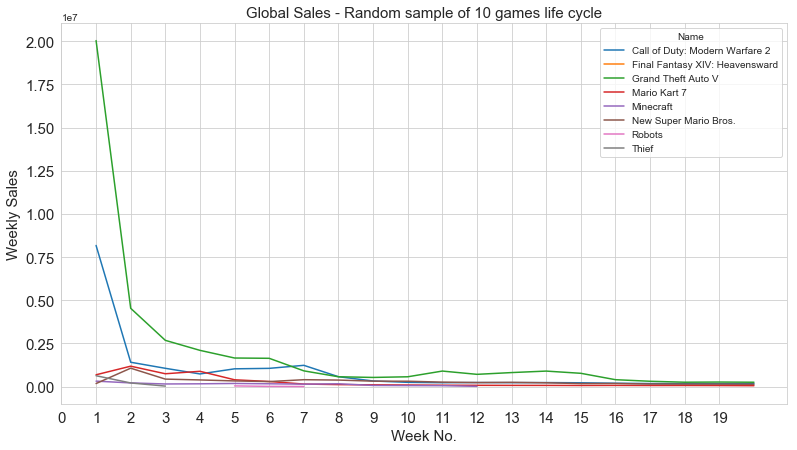

In [220]:
salestrend = sampledata.groupby(['Name','Week_No.'])[['Weekly_Sales']].sum()
ax = salestrend.reset_index().pivot(index='Week_No.',columns='Name',values='Weekly_Sales').plot(figsize=(13,7),fontsize=15,xticks=list(range(0,20)))
ax.set_xlabel('Week No.', fontsize=15)
ax.set_ylabel('Weekly Sales',fontsize=15)
ax.set_title('Global Sales - Random sample of 10 games life cycle', fontsize =15)

Text(0.5,1,'Global Sales - Random sample of 10 games life cycle, Cumulative Sales')

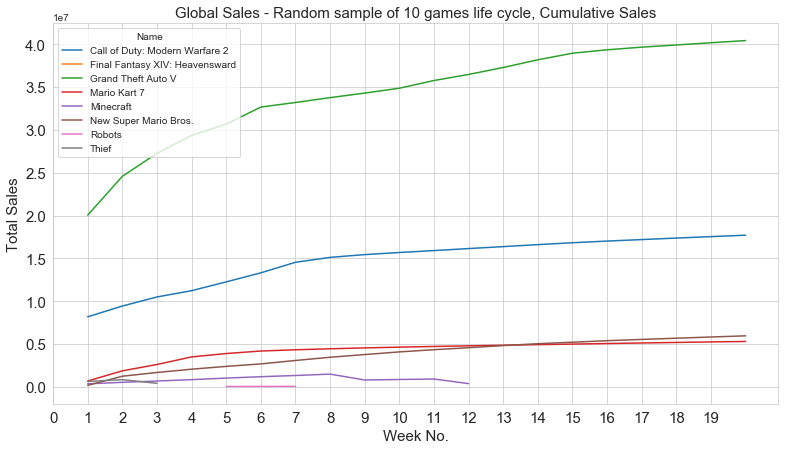

In [221]:
totaltrend = sampledata.groupby(['Name','Week_No.'])[['Total_Sales']].sum()
ax = totaltrend.reset_index().pivot(index='Week_No.',columns='Name',values='Total_Sales').plot(figsize=(13,7),fontsize=15,xticks=list(range(0,20)))
ax.set_xlabel('Week No.', fontsize=15)
ax.set_ylabel('Total Sales',fontsize=15)
ax.set_title('Global Sales - Random sample of 10 games life cycle, Cumulative Sales', fontsize =15)